In [1]:
from Hamiltonian_definition import build_HN
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ft2font
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
import itertools
from itertools import zip_longest
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse import dok_matrix
from scipy.sparse import block_diag
from scipy.sparse.linalg import eigsh
import scipy.linalg as la
import os
import Hamiltonian_definition as HD

In [2]:
# save_path = "/home/costanza/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/Lanczos/"
save_path = r"C:/Users/Costa/UNIVERSITÀ/secondo semestre/MOLTI CORPI/dati/Lanczos/"

Lx, Ly = 4,4 # lattice dim
L=Lx*Ly
dim=2**(Lx*Ly)


### Lattice definition

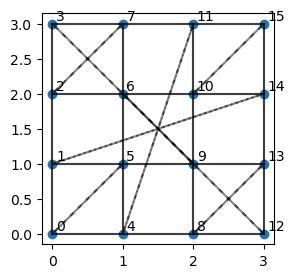

0 --> Nearest neighbors: [4, 3]  -- Next neighbor: [5]
1 --> Nearest neighbors: [5, 0]  -- Next neighbor: [14]
2 --> Nearest neighbors: [6, 1]  -- Next neighbor: [7]
3 --> Nearest neighbors: [7, 2]  -- Next neighbor: [12]
4 --> Nearest neighbors: [8, 7]  -- Next neighbor: [11]
5 --> Nearest neighbors: [9, 4]  -- Next neighbor: [0]
6 --> Nearest neighbors: [10, 5]  -- Next neighbor: [9]
7 --> Nearest neighbors: [11, 6]  -- Next neighbor: [2]
8 --> Nearest neighbors: [12, 11]  -- Next neighbor: [13]
9 --> Nearest neighbors: [13, 8]  -- Next neighbor: [6]
10 --> Nearest neighbors: [14, 9]  -- Next neighbor: [15]
11 --> Nearest neighbors: [15, 10]  -- Next neighbor: [4]
12 --> Nearest neighbors: [0, 15]  -- Next neighbor: [3]
13 --> Nearest neighbors: [1, 12]  -- Next neighbor: [8]
14 --> Nearest neighbors: [2, 13]  -- Next neighbor: [1]
15 --> Nearest neighbors: [3, 14]  -- Next neighbor: [10]


In [3]:
coor = HD.generate_lattice(Lx,Ly)
neighbors_indices = HD.index_nn(coor,Lx,Ly)
diag_indices = HD.index_nnn(coor,Lx,Ly)

HD.plot_lattice(coor,neighbors_indices,diag_indices)

## Sparse total matrix 

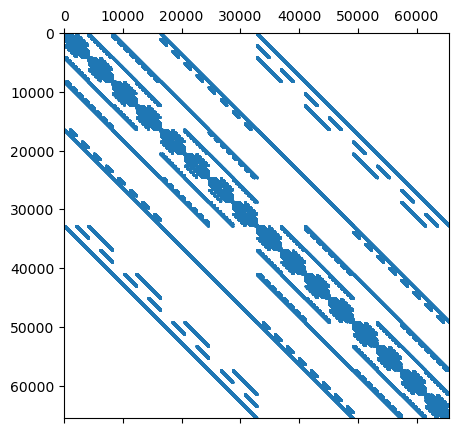

In [5]:
J1, J2 = 1., 0.
row,col,data = [],[],[]
for i in range(dim):
    state = i
    H = HD.Hamiltonian(J1, J2, state, Lx, Ly, neighbors_indices, diag_indices)
    for value,j in H:
        row.append(i)      
        col.append(j)      
        data.append(value) #appende value in posizione (i,j) 
sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
#print(sparse_matrix.toarray())

plt.figure(figsize=(5,5))
plt.spy(sparse_matrix, markersize=0.5)
# plt.savefig(full_path + "sparse_matrix.png")

plt.show()

### Diagonalization of the total matrix

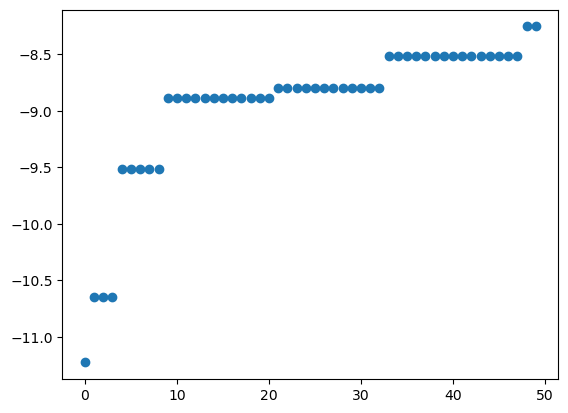

CPU times: total: 3min 14s
Wall time: 24.6 s


In [8]:
%%time
#sparse_matrix MATRICE (sparsa)
vals, vecs = eigsh(sparse_matrix, k=50, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
full_path = save_path
np.save(full_path+"50eigvals", vals)
np.save(full_path+"50eigvecs", vecs)
plt.plot(vals, "o")
# plt.savefig(full_path + "60_eigen_values.png")
plt.show()

In [9]:
#  Ground state
print(vals[0])

-11.228483208428793


## LOOP

-6.000000000000006
-5.884711682419388
-5.5432771950677235
-5.003067352111813
-6.805382650067989
-8.41987238925834
-9.732464854061316
-10.682097583979248
-11.228483208428848


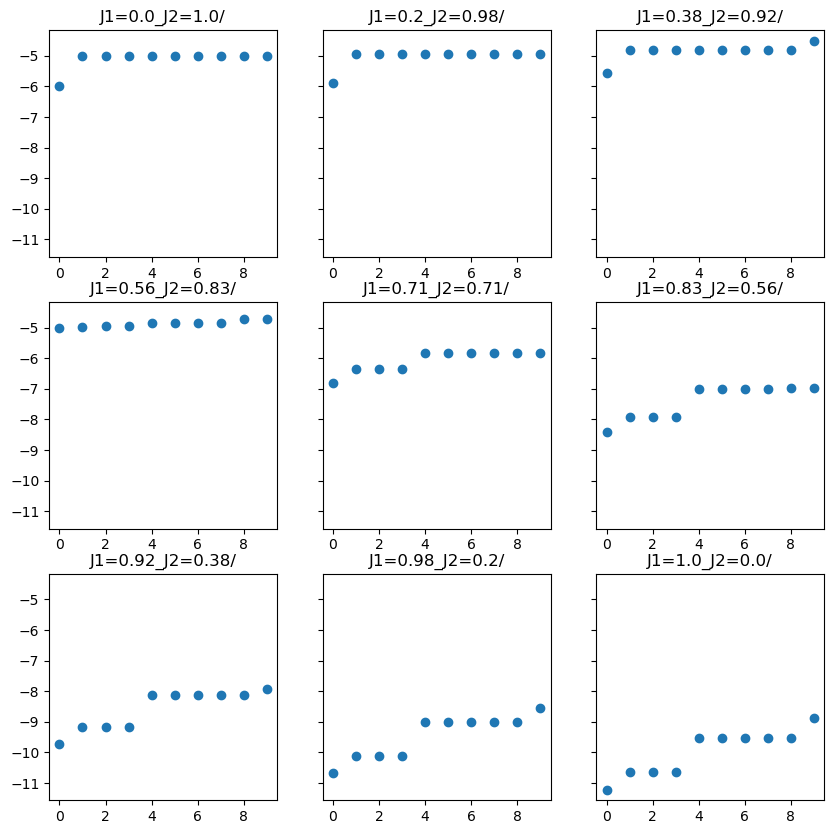

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharey=True)

all_theta = [i*np.pi/16 for i in range(9)]
for f, ax in enumerate(axes.flatten()):
    F = f
    J1 = np.sin(all_theta[F])
    J2 = np.cos(all_theta[F])
    folder_name = f"J1={round(J1,2)}_J2={round(J2,2)}/"
    full_path = save_path + folder_name
    os.makedirs(full_path, exist_ok=True)       

    #matrice sparsa
    row,col,data = [],[],[]
    for i in range(dim):
        state = i
        H = HD.Hamiltonian(J1, J2, state, Lx, Ly, neighbors_indices, diag_indices)
        for value,j in H:
            row.append(i)      
            col.append(j)      
            data.append(value) #appende value in posizione (i,j) 
    sparse_matrix = csr_matrix((data,(row,col)),shape=(dim,dim))
    #print(sparse_matrix.toarray())

    #diag
    vals, vecs = eigsh(sparse_matrix, k=10, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    print(vals[0])
    np.save(full_path+"10eigvals", vals)
    np.save(full_path+"10eigvecs", vecs)
    ax.plot(vals, "o")
    ax.set_title(folder_name)
plt.show()

### first eigen value of the N block

1 primo autoval=3.9999999999999987
2 primo autoval=0.3542486889354088
3 primo autoval=-2.8661982625090237
4 primo autoval=-5.617279503296579
5 primo autoval=-7.836537573479822
6 primo autoval=-9.517687983937272
7 primo autoval=-10.649884872663442
8 primo autoval=-11.228483208428845
9 primo autoval=-10.649884872663451
10 primo autoval=-9.517687983937266
11 primo autoval=-7.836537573479822
12 primo autoval=-5.617279503296585
13 primo autoval=-2.86619826250902
14 primo autoval=0.3542486889354091
15 primo autoval=4.000000000000001


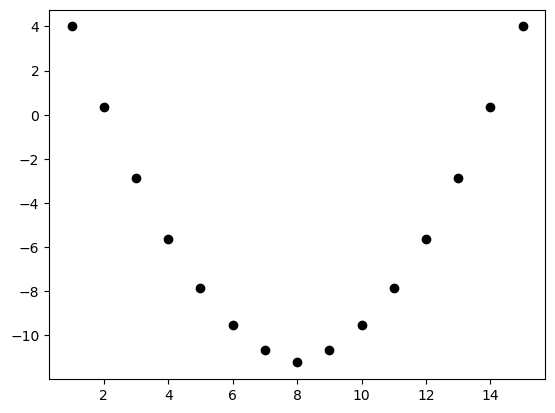

In [16]:
#%%time
#diagonalizzazione singoli blocchi

for N in range(1,L):
    HN =  build_HN(Lx,Ly,N,J1,J2,neighbors_indices,diag_indices)
    vals, vecs = eigsh(HN, k=1, which='SA') #LM Largest Magnitude, SM Smallest Magnitud, LA Largest Algebric, SA Smallest Algebric
    print(N, f"primo autoval={vals[0]}")#, autostato={vecs[:,0]}")
    plt.plot(N, vals[0], "o", color="black")
plt.savefig(full_path + "single_blocks_first_eigen_value.png")
plt.show()